In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('train.csv')
print(df.shape)
df.head()

(252175, 91)


,Year,S0,S1,S2,S3,S4,S5,S6,S7,S8,...,S80,S81,S82,S83,S84,S85,S86,S87,S88,S89
0,2007,44.76752,114.82099,3.83239,27.99928,1.49153,-15.90853,28.24844,3.61650,-7.24653,...,-1.89619,-471.02844,411.56205,443.01198,19.30254,309.07806,-336.91706,-14.70547,-474.44157,31.32820
1,2004,52.28942,75.73319,11.35941,-6.20582,-27.64559,-30.75995,12.50955,7.47877,9.88498,...,4.57060,1.36110,-6.52977,59.48672,3.69790,-36.92252,44.08077,3.39993,-70.07591,3.86143
2,2005,33.81773,-139.07371,134.19332,17.85216,63.47408,-25.28005,-34.65911,-5.99135,1.27848,...,54.16608,15.04530,39.09107,39.03041,3.68708,-61.88547,45.68115,6.39822,3.24471,35.74749
3,1998,41.60866,3.17811,-3.97174,23.53564,-19.68553,20.74407,18.80866,6.24474,-7.98424,...,28.08591,295.88684,54.02395,102.02880,40.47711,15.10258,-250.32293,2.81288,56.05172,3.60432
4,1987,44.49525,-32.25270,58.08217,3.73684,-32.53274,-18.72885,-15.85665,-3.34607,22.63786,...,31.44988,-136.50457,-85.11989,-74.96342,9.56921,-100.61689,-133.29315,9.19246,-97.37953,30.11015


## Grafico frequenza anni

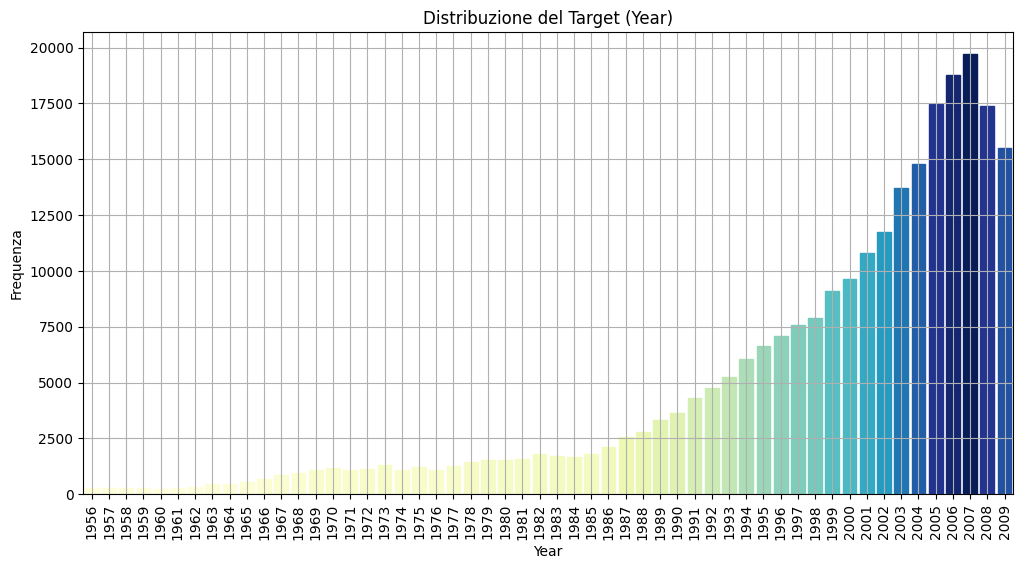

In [4]:
# Calcoliamo la frequenza di ogni anno
year_counts = df['Year'].value_counts().sort_index()

# Creiamo una mappa di colori basata su queste frequenze
norm = plt.Normalize(year_counts.min(), year_counts.max())
colors = plt.cm.YlGnBu(norm(year_counts.values))

# Convertiamo l'array numpy dei colori in una lista
colors_list = [colors[i] for i in range(len(colors))]

plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=year_counts.index, y=year_counts.values)
plt.title('Distribuzione del Target (Year)')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Frequenza')
plt.grid(True)

# Coloriamo manualmente ogni barra
for i, bar in enumerate(barplot.patches):
    bar.set_color(colors_list[i])

plt.show()


## Correlazione tra tutte le feature

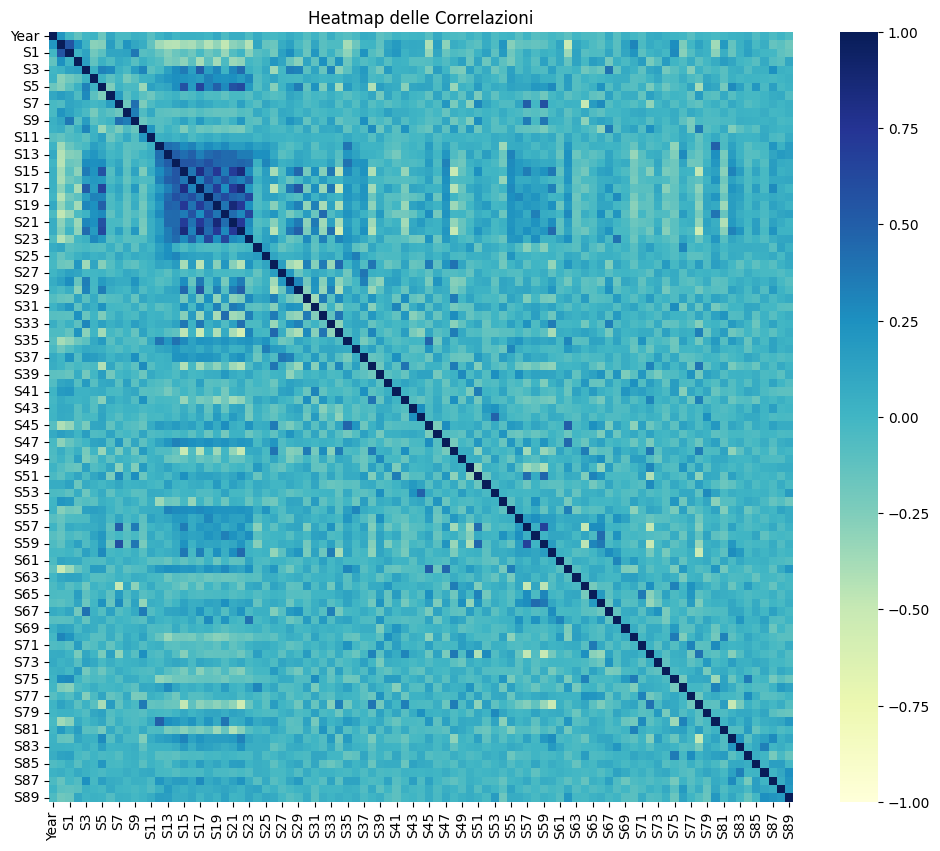

In [5]:
# Calcolo della matrice di correlazione
correlation_matrix = df.corr()

# Heatmap delle correlazioni
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='YlGnBu', vmin=-1, vmax=1)
plt.title('Heatmap delle Correlazioni')
plt.show()

## Features più correlate e features meno correlate

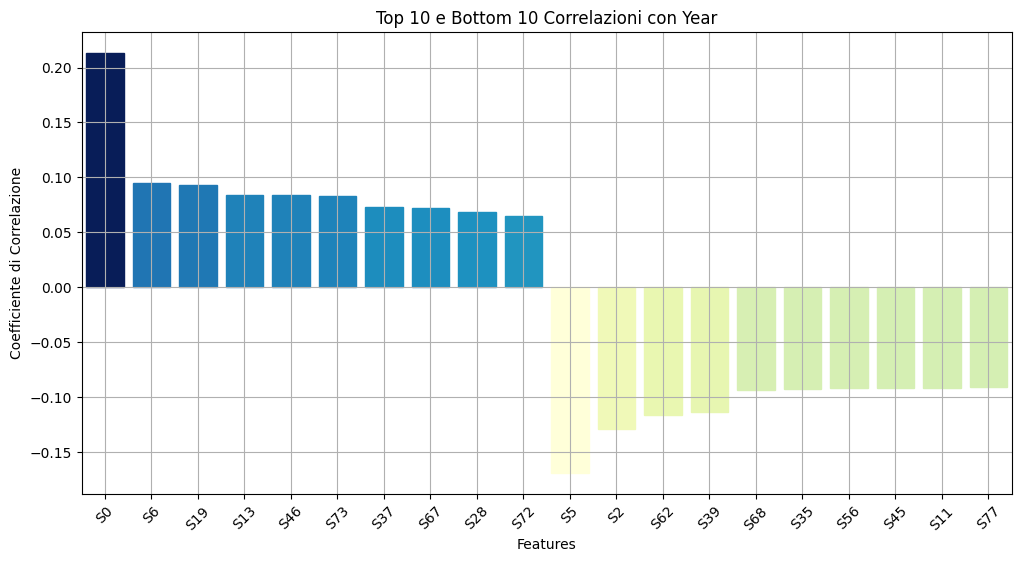

In [6]:
# Assumi che 'data' sia il tuo DataFrame
correlation_with_year = df.corr()['Year']

# Rimuoviamo la correlazione di 'Year' con se stesso
correlation_with_year = correlation_with_year.drop(labels=['Year'])

# Calcoliamo le 10 feature più correlate e le 10 meno correlate con "Year"
top_correlated = correlation_with_year.sort_values(ascending=False).head(10)
bottom_correlated = correlation_with_year.sort_values(ascending=True).head(10)

# Uniamo le serie in un unico DataFrame per il grafico
correlation_data = pd.concat([top_correlated, bottom_correlated])

# Creiamo una mappa di colori basata sulle correlazioni
norm = plt.Normalize(correlation_data.min(), correlation_data.max())
colors = plt.cm.YlGnBu(norm(correlation_data.values))

# Convertiamo l'array numpy dei colori in una lista
colors_list = [colors[i] for i in range(len(colors))]

# Creiamo un grafico a barre per mostrare queste correlazioni
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=correlation_data.index, y=correlation_data.values)
plt.title('Top 10 e Bottom 10 Correlazioni con Year')
plt.ylabel('Coefficiente di Correlazione')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.grid(True)

# Coloriamo manualmente ogni barra
for i, bar in enumerate(barplot.patches):
    bar.set_color(colors_list[i])

plt.show()